In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [2]:
df=pd.read_csv(r'/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.Sex=df.Sex.replace({'F':1,'M':2})

In [8]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,2,LOW,HIGH,13.093,drugC
2,47,2,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,2,LOW,HIGH,12.006,drugC
197,52,2,NORMAL,HIGH,9.894,drugX
198,23,2,NORMAL,NORMAL,14.020,drugX


In [9]:
df.BP=df.BP.replace({'HIGH':180,'NORMAL':125,'LOW':70})

In [10]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,180,HIGH,25.355,drugY
1,47,2,70,HIGH,13.093,drugC
2,47,2,70,HIGH,10.114,drugC
3,28,1,125,HIGH,7.798,drugX
4,61,1,70,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,1,70,HIGH,11.567,drugC
196,16,2,70,HIGH,12.006,drugC
197,52,2,125,HIGH,9.894,drugX
198,23,2,125,NORMAL,14.020,drugX


In [11]:
df.Cholesterol=df.Cholesterol.replace({'HIGH':220,'NORMAL':200,'LOW':180})

In [12]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,180,220,25.355,drugY
1,47,2,70,220,13.093,drugC
2,47,2,70,220,10.114,drugC
3,28,1,125,220,7.798,drugX
4,61,1,70,220,18.043,drugY
...,...,...,...,...,...,...
195,56,1,70,220,11.567,drugC
196,16,2,70,220,12.006,drugC
197,52,2,125,220,9.894,drugX
198,23,2,125,200,14.020,drugX


In [13]:
x=df[['Age','Sex','BP','Cholesterol','Na_to_K']]

In [14]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,180,220,25.355
1,47,2,70,220,13.093
2,47,2,70,220,10.114
3,28,1,125,220,7.798
4,61,1,70,220,18.043
...,...,...,...,...,...
195,56,1,70,220,11.567
196,16,2,70,220,12.006
197,52,2,125,220,9.894
198,23,2,125,200,14.020


In [15]:
y=df.Drug

In [16]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [17]:
y.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 5)
(40, 5)
(160,)
(40,)


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model=DecisionTreeClassifier()

In [23]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_predict=model.predict(x_test)
y_predict

array(['drugY', 'drugA', 'drugX', 'drugX', 'drugY', 'drugY', 'drugB',
       'drugA', 'drugB', 'drugY', 'drugY', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugA', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugX', 'drugY', 'drugA', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugA', 'drugX', 'drugX',
       'drugA', 'drugY', 'drugB', 'drugY', 'drugC'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_predict)*100

100.0

In [27]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})

In [28]:
df

,Actual,Predicted
180,drugY,drugY
169,drugA,drugA
117,drugX,drugX
112,drugX,drugX
40,drugY,drugY
121,drugY,drugY
161,drugB,drugB
100,drugA,drugA
142,drugB,drugB
50,drugY,drugY


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
performance=confusion_matrix(y_test,y_predict)

In [31]:
performance

array([[ 9,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0, 16]])

In [32]:
from sklearn.metrics import plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


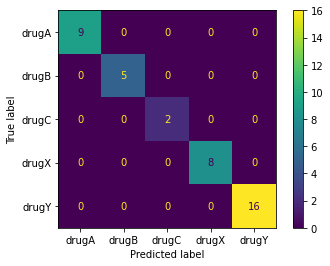

In [33]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [34]:
c_f=pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

In [35]:
c_f

Predicted,drugA,drugB,drugC,drugX,drugY
Actual,,,,,
drugA,9,0,0,0,0
drugB,0,5,0,0,0
drugC,0,0,2,0,0
drugX,0,0,0,8,0
drugY,0,0,0,0,16


In [36]:
import seaborn as sns

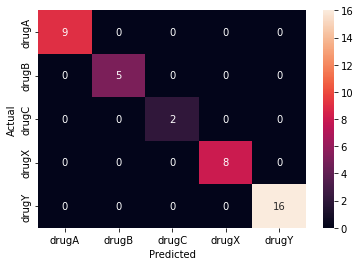

In [37]:
sns.heatmap(c_f,annot=True)
plt.show()

In [38]:
from sklearn import tree

In [39]:
import matplotlib.pyplot as plt

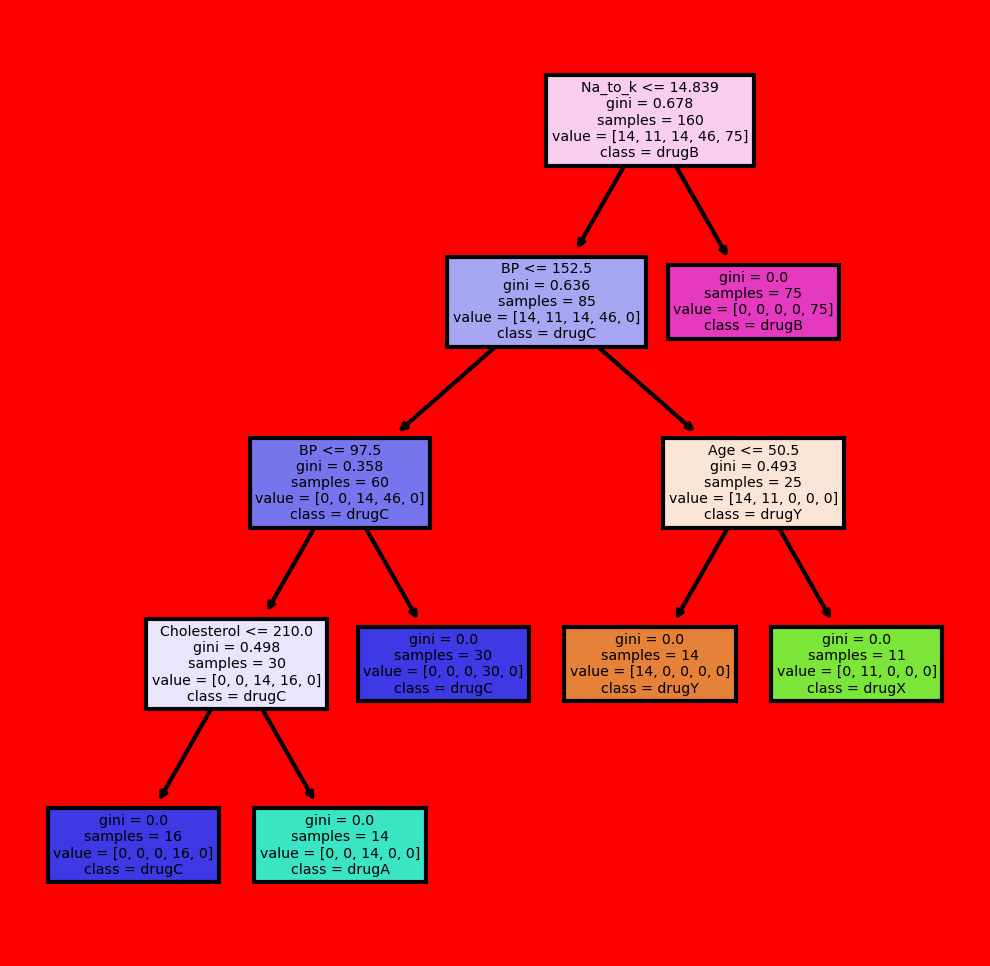

In [40]:
feature_names=['Age','Sex','BP','Cholesterol','Na_to_k']
class_names=['drugY','drugX','drugA','drugC','drugB']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300,facecolor='r')
tree.plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
fig.savefig('drug.png')